In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
Housing = pd.read_csv("D:\Data for Preprocessing\housing_data (Matplotlib).csv", parse_dates=['period_begin', 'period_end'])

In [15]:
Housing.dropna(inplace = True)

In [16]:
Housing

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
2,"Johnson County, TX",2019-09-23,2019-12-15,577.0,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-09-10,2017-12-31,22.0,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-09-01,2017-02-04,12.0,54.0,55.0,151.2,158062.5,38.300000
5,"Barry County, MO",2020-11-23,2021-02-14,79.0,70.0,77.0,82.8,196509.1,13.157870
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107.0,1729.0,2206.0,27.5,445540.9,5.235794
...,...,...,...,...,...,...,...,...,...
622313,"Boulder County, CO",2018-01-15,2018-08-04,973.0,746.0,838.0,44.9,647883.0,10.992834
622315,"Randolph County, MO",2019-11-03,2019-02-06,21.0,12.0,13.0,23.5,122793.7,9.219697
622324,"Sullivan County, IN",2018-05-03,2018-05-27,1.0,10.0,10.0,87.1,61741.6,10.000000
622329,"Clatsop County, OR",2019-03-06,2019-08-25,1.0,4.0,4.0,53.7,650000.0,4.000000


In [17]:
Housing = Housing.astype({'total_homes_sold': 'int32', 'region_name': 'category'})

In [18]:
ca_Housing = Housing.loc[(Housing['region_name'].str.contains('CA'))].assign(region_name = Housing['region_name'].str[0:-11])

In [19]:
ca_Housing

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-03-09,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-05-06,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-12-04,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-04-02,1200,797.0,907.0,56.5,330049.9,9.744362
...,...,...,...,...,...,...,...,...,...
622048,Colusa,2018-09-17,2018-09-12,30,8.0,8.0,83.0,392749.8,4.909722
622099,Merced,2018-08-01,2018-01-04,535,552.0,612.0,55.6,291834.9,14.373568
622118,Lassen,2017-01-05,2017-07-23,1,4.0,4.0,121.1,138666.6,5.000000
622159,Los Angeles,2021-06-28,2021-09-19,19525,14252.0,16098.0,35.5,888483.3,10.008760


In [20]:
ca_housing_pivot = ca_Housing.pivot(index = 'period_begin', columns='region_name', values='median_active_list_price').assign(ca_average = lambda x: x.mean(axis =1))

In [21]:
ca_housing_pivot

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,ca_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-05,765715.2,597250.0,384733.2,297841.6,571583.3,351041.6,649845.1,524090.0,279000.0,237312.5,...,320965.3,278500.0,252820.8,379416.6,241883.3,223343.7,662220.1,467995.0,386583.3,511993.420755
2017-01-16,742021.6,NaN,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,502361.666000
2017-01-23,748271.7,NaN,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,503231.368627
2017-01-30,753938.4,NaN,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,505131.909804
2017-02-01,730602.5,NaN,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,498664.030000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,998220.8,462671.6,491529.1,457523.8,530163.7,398183.3,831069.7,703252.0,429960.0,385716.6,...,486949.0,464912.5,429054.0,488666.6,392628.7,456632.7,873099.4,655680.0,463955.0,688836.841818
2022-07-02,943186.9,538950.0,509237.5,460400.0,521995.8,384643.1,809991.0,721491.4,403504.1,362479.1,...,487694.1,450032.0,399979.0,441083.3,380810.2,548166.4,853807.5,661001.5,456324.5,681871.692593
2022-07-03,977603.6,509250.0,495858.3,463145.0,532509.6,378801.5,821481.9,707739.3,417462.5,369720.8,...,492331.5,456461.2,404879.0,455958.3,386553.9,501661.8,860185.0,660311.0,462587.9,683471.456364


In [22]:
ca_Housing_market =  ca_housing_pivot.loc[:, ['San Francisco', 'Los Angeles', 'San Diego', 'Tulare']]

In [23]:
ca_Housing_market

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-05,1267541.6,650320.8,653140.5,241883.3
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5
2017-02-01,1229018.7,611561.0,618570.8,225395.8
...,...,...,...,...
2022-04-25,1295750.0,906744.9,901916.4,392628.7
2022-07-02,1292458.3,899373.7,885670.6,380810.2
2022-07-03,1291375.0,903258.0,898149.6,386553.9


### Lecture - 55

In [24]:
fig, ax = plt.subplots(2,2, sharex='all', figsize = (14,6))

ax[0][0].plot(ca_Housing_market.index, ca_Housing_market['Tulare'])
ax[0][1].plot(ca_Housing_market.index, ca_Housing_market['Los Angeles'])
ax[1][0].plot(ca_Housing_market.index, ca_Housing_market['San Francisco'])
ax[1][1].plot(ca_Housing_market.index, ca_Housing_market['San Diego'])

plt.tight_layout()fig, ax = plt.subplots(2,2, sharex='all', figsize = (14,6))

ax[0][0].plot(ca_Housing_market.index, ca_Housing_market['Tulare'])
ax[0][1].plot(ca_Housing_market.index, ca_Housing_market['Los Angeles'])
ax[1][0].plot(ca_Housing_market.index, ca_Housing_market['San Francisco'])
ax[1][1].plot(ca_Housing_market.index, ca_Housing_market['San Diego'])

plt.tight_layout()

SyntaxError: invalid syntax (Temp/ipykernel_3184/3769021105.py, line 8)

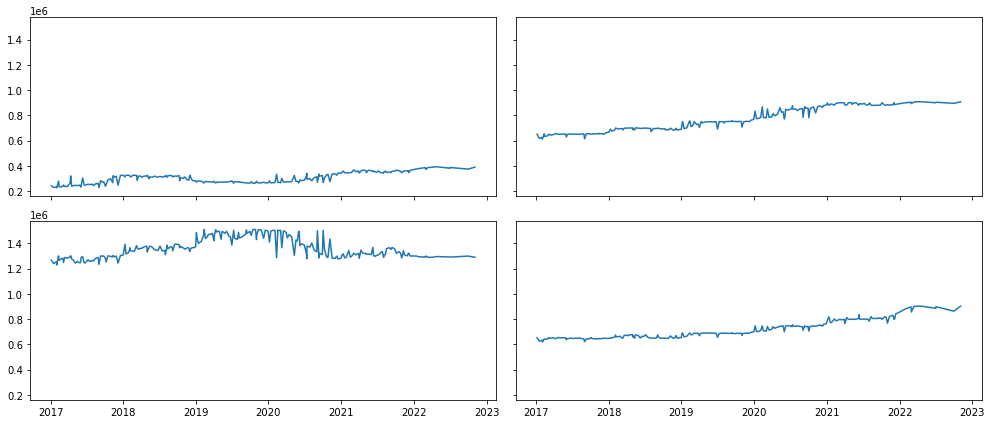

In [ ]:
fig, ax = plt.subplots(2,2, sharex='all',sharey='all', figsize = (14,6))

ax[0][0].plot(ca_Housing_market.index, ca_Housing_market['Tulare'])
ax[0][1].plot(ca_Housing_market.index, ca_Housing_market['Los Angeles'])
ax[1][0].plot(ca_Housing_market.index, ca_Housing_market['San Francisco'])
ax[1][1].plot(ca_Housing_market.index, ca_Housing_market['San Diego'])

plt.tight_layout()

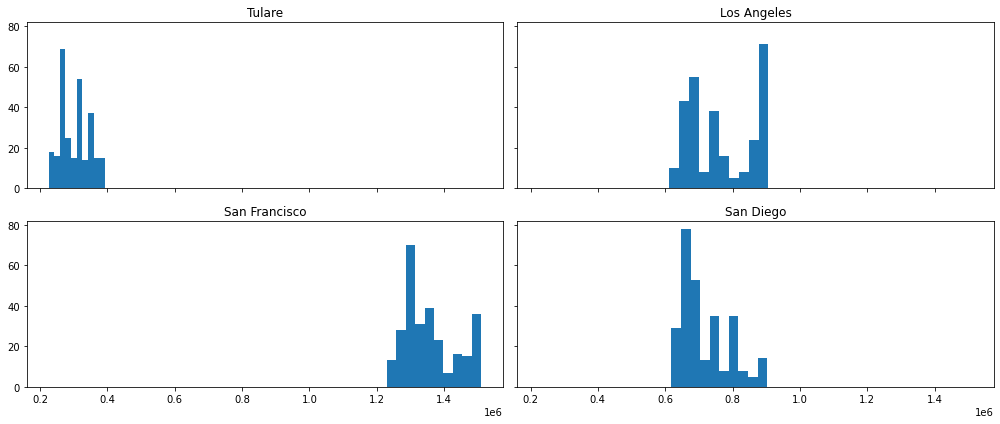

In [ ]:
fig, ax = plt.subplots(2,2, sharex='all',sharey='all', figsize = (14,6))

ax[0][0].hist(ca_Housing_market['Tulare'])
ax[0][0].set_title('Tulare')

ax[0][1].hist(ca_Housing_market['Los Angeles'])
ax[0][1].set_title('Los Angeles')

ax[1][0].hist(ca_Housing_market['San Francisco'])
ax[1][0].set_title('San Francisco')


ax[1][1].hist(ca_Housing_market['San Diego'])
ax[1][1].set_title('San Diego')



plt.tight_layout()

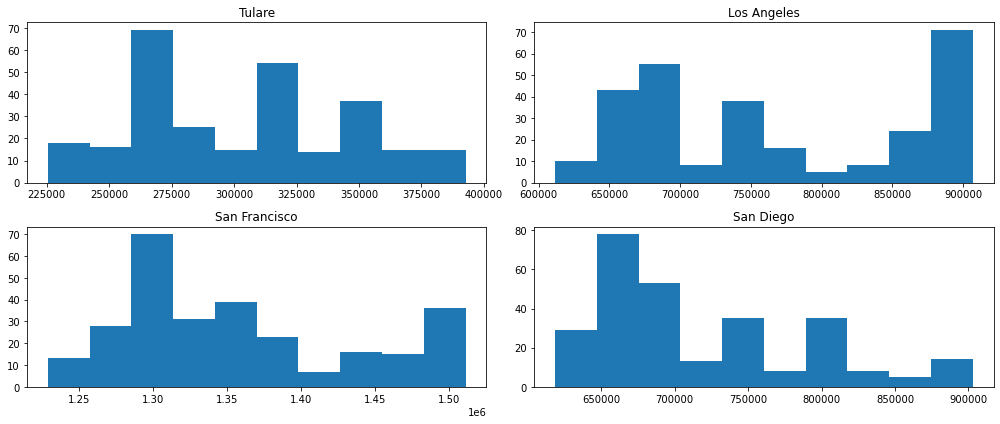

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (14,6))

ax[0][0].hist(ca_Housing_market['Tulare'])
ax[0][0].set_title('Tulare')

ax[0][1].hist(ca_Housing_market['Los Angeles'])
ax[0][1].set_title('Los Angeles')

ax[1][0].hist(ca_Housing_market['San Francisco'])
ax[1][0].set_title('San Francisco')


ax[1][1].hist(ca_Housing_market['San Diego'])
ax[1][1].set_title('San Diego')

plt.tight_layout()



### Lecture - 56 & 57 - Problems and Solution

### Lecture - 58

In [ ]:
diamond_data = pd.read_csv('D:\Data for Preprocessing\Diamonds Prices2022.csv', index_col=0)

In [ ]:
-diamond_data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [ ]:
diamond_data['carat'].describe()

count    53943.000000
mean         0.797935
std          0.473999
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [ ]:
from matplotlib import gridspec

(array([25335.,  9331.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <BarContainer object of 10 artists>)

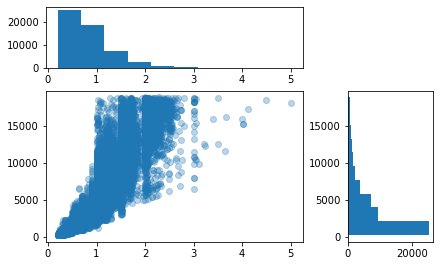

In [ ]:
fig = plt.figure(constrained_layout = True)

grid = gridspec.GridSpec(8, 8, figure=fig)

ax1 = fig.add_subplot(grid[2:7, 0:6])

ax1.scatter(
    diamond_data['carat'],
    diamond_data['price'],
    alpha=0.3
)

ax2 = fig.add_subplot(grid[0:2, 0:6])

ax2.hist(diamond_data['carat'])

ax3 = fig.add_subplot(grid[2:7, 6:])
ax3.hist(diamond_data['price'], orientation='horizontal')


(array([25335.,  9331.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <BarContainer object of 10 artists>)

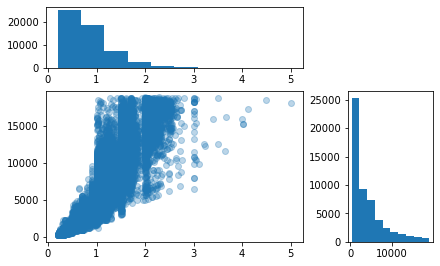

In [ ]:
fig = plt.figure(constrained_layout = True)

grid = gridspec.GridSpec(8, 8, figure=fig)

ax1 = fig.add_subplot(grid[2:7, 0:6])

ax1.scatter(
    diamond_data['carat'],
    diamond_data['price'],
    alpha=0.3
)

ax2 = fig.add_subplot(grid[0:2, 0:6])

ax2.hist(diamond_data['carat'])

ax3 = fig.add_subplot(grid[2:7, 6:])
ax3.hist(diamond_data['price'])

### Lecture - 59 & 60 - Problems and Solution

### Lecture - 61

In [ ]:
ca_Housing_market

region_name,San Francisco,Los Angeles,San Diego,Tulare
period_begin,,,,
2017-01-05,1267541.6,650320.8,653140.5,241883.3
2017-01-16,1239977.0,617311.0,625820.8,229060.4
2017-01-23,1247977.0,620644.3,629491.6,229806.2
2017-01-30,1253310.4,624541.6,632824.0,230139.5
2017-02-01,1229018.7,611561.0,618570.8,225395.8
...,...,...,...,...
2022-04-25,1295750.0,906744.9,901916.4,392628.7
2022-07-02,1292458.3,899373.7,885670.6,380810.2
2022-07-03,1291375.0,903258.0,898149.6,386553.9


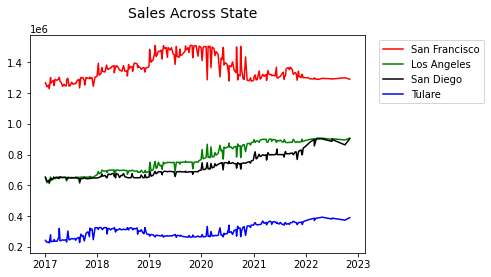

In [ ]:
fig, ax = plt.subplots()

colors = ['red', 'green', 'black', 'blue']

for i, color in enumerate(colors):
    ax.plot(
        ca_Housing_market.index,
        ca_Housing_market.iloc[:, i],
        c = color,
        label = ca_Housing_market.columns[i]
    )

fig.suptitle("Sales Across State", fontsize = 14)

ax.legend(ca_Housing_market.columns,bbox_to_anchor = (1.37,1))   

### Lecture - 62

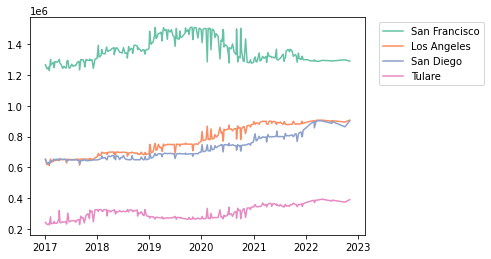

In [ ]:
fig, ax = plt.subplots()

plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)

for i in range(4):
    ax.plot(ca_Housing_market.index, ca_Housing_market.iloc[:, i])

ax.legend(ca_Housing_market, bbox_to_anchor = (1.37,1))

### Lecture - 63 & 64 - Problems and Solution

### Lecture - 65

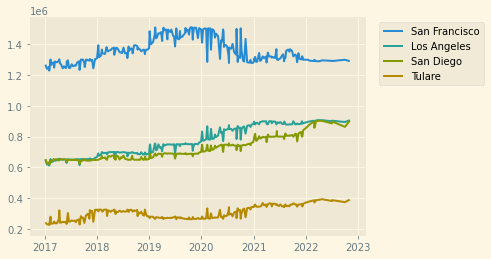

In [ ]:
plt.style.use('ggplot')
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots()

plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)

for i in range(4):
    ax.plot(ca_Housing_market.index, ca_Housing_market.iloc[:, i])

ax.legend(ca_Housing_market, bbox_to_anchor = (1.37,1))

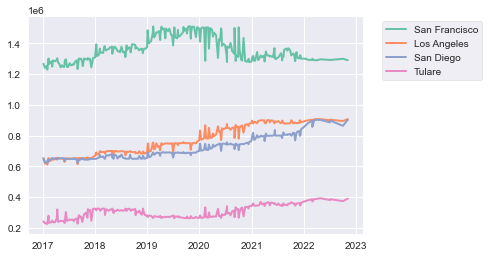

In [ ]:
sns.set_style('darkgrid')

fig, ax = plt.subplots()

plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)

for i in range(4):
    ax.plot(ca_Housing_market.index, ca_Housing_market.iloc[:, i])

ax.legend(ca_Housing_market, bbox_to_anchor = (1.37,1))

### Lecture - 66 & 67 - Problems and Solution

### Lecture - 68

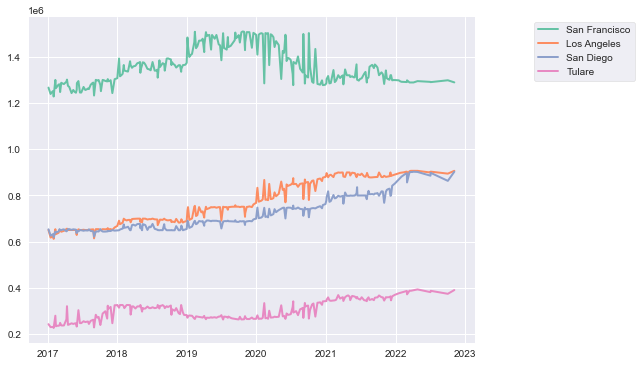

In [ ]:
plt.rc('axes.spines', right = False, top = False)
plt.rc('axes', titlesize=20)
plt.rcParams['figure.figsize'] = (8,6)

fig, ax = plt.subplots()

plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)

for i in range(4):
    ax.plot(ca_Housing_market.index, ca_Housing_market.iloc[:, i])

ax.legend(ca_Housing_market, bbox_to_anchor = (1.37,1))

In [ ]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        